In [23]:
# Pre-reqs and libraries to import
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Chapter 5

# Model Evaluation and Improvement

In [24]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
X, y = make_blobs(random_state=0)

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0)

In [27]:
logreg = LogisticRegression().fit(X_train, y_train)

In [28]:
logreg.score(X_train, y_train)

0.9066666666666666

In [29]:
logreg.score(X_test, y_test)

0.88

- Cross validation
  - Methods to evaluate a model that go beyond default measures of accuracy and R2 metrics provided by the score method
- Grid search
  - A method adjusting parameters 

# Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [31]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [32]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)

In [33]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [34]:
scores.mean()

0.9733333333333334

# Benefits of Cross-Validation

# Stratified k-Fold Cross-Validation and Other Strategies

- When target data is ordered by class label

# More Control over cross-validation

# Leave-one-out cross-validation

# Shuffle-split cross-validation

# Cross-validation with groups

# Grid Search

- Find the values of the important parameters is a tricky task
- Grid search is a standard method to help
- It basically tries all possible combinations of the parameters of interest

# Simple Grid Search

In [35]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [36]:
X_train.shape[0]

112

In [37]:
X_test.shape[0]

38

In [38]:
best_score = 0

In [39]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [40]:
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


# The Danger of Overfitting the Parameters and the Validation Set

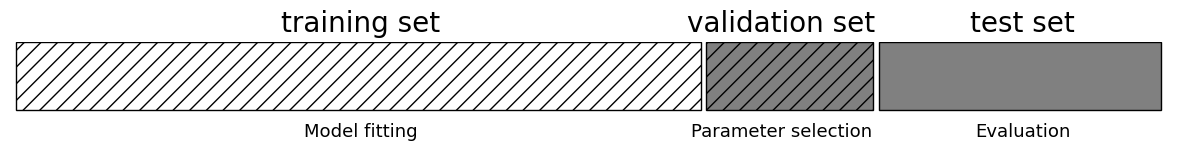

In [41]:
mglearn.plots.plot_threefold_split()

In [42]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [43]:
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [44]:
print("Size of training set: {} size of validation set: {} size of test set:"" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

Size of training set: 84 size of validation set: 28 size of test set: 38



In [45]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [46]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


# Grid Search with Cross-Validation

In [47]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [48]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

# GridSearchCV Class

In [49]:
param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    }

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [51]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [54]:
grid_search.score(X_test, y_test)

0.9736842105263158

# Analyzing the result of cross-validation

In [55]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

In [56]:
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000997,5.352484e-07,0.000998,5.519789e-07,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001196,3.986837e-04,0.000798,3.990657e-04,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001197,3.990890e-04,0.000798,3.989697e-04,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000997,7.747687e-07,0.000598,4.883835e-04,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000997,1.507891e-07,0.000598,4.886555e-04,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [57]:
scores = np.array(results.mean_test_score).reshape(6, 6)
scores = np.array(results.mean_test_score).reshape(6, 6)

TypeError: Only length-1 arrays can be converted to Python scalars

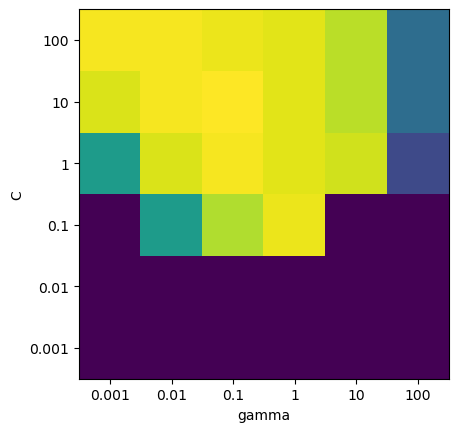

In [58]:
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# Evaluating Metrics and Scoring

# Keep the End Goal in Mind

- We're interested in making accurate predictions, but also i using these predictions as part of a larger decision making process.
- Before picking a learning machine metric, think about the high level goal or the business metric

# Metrics for Binary Classification 

# Kinds of errors

- False Positive 
- False Negative

# Imbalanced datasets

In [68]:
from sklearn.datasets import load_digits

In [69]:
digits = load_digits()
y = digits.target == 9

In [ ]:
dir(digits)
print(digits.DESCR)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [ ]:
pred_most_frequent = dummy_majority.predict(X_test)

In [ ]:
np.unique(pred_most_frequent)

array([False])

In [ ]:
dummy_majority.score(X_test, y_test)

0.8955555555555555

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [ ]:
pred_tree = tree.predict(X_test)

In [ ]:
tree.score(X_test, y_test)

0.9177777777777778

In [61]:
from sklearn.linear_model import LogisticRegression

In [72]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
dummy.score(X_test, y_test)

0.8955555555555555

In [71]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
logreg.score(X_test, y_test)

C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9844444444444445

# Confusion Matrix

In [ ]:
X_train

In [ ]:
pred_logreg

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion = confusion_matrix(y_test, pred_logreg)

In [78]:
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()